In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df = df[df['Balance'] != 0]

df = df.sample(frac = 0.1)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 1547 to 8435
Data columns (total 3 columns):
CreditScore        638 non-null int64
Balance            638 non-null float64
EstimatedSalary    638 non-null float64
dtypes: float64(2), int64(1)
memory usage: 19.9 KB


,CreditScore,Balance,EstimatedSalary
1547,653,88243.29,96658.26
6100,796,137262.71,62905.29
9728,616,95984.21,115262.54
1600,517,115062.61,179056.23
7039,523,163894.35,57061.71


In [5]:
for i in [0,1,2]:
    df.iloc[:, i] = (df.iloc[:, i] - df.iloc[:, i].mean())/df.iloc[:, i].std()

In [6]:
df.columns = ['x1', 'x2', 'x3']

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 1547 to 8435
Data columns (total 3 columns):
x1    638 non-null float64
x2    638 non-null float64
x3    638 non-null float64
dtypes: float64(3)
memory usage: 19.9 KB


,x1,x2,x3
1547,0.023920,-1.032606,-0.114918
6100,1.507484,0.555454,-0.715018
9728,-0.359939,-0.781827,0.215851
1600,-1.387022,-0.163753,1.350051
7039,-1.324774,1.418227,-0.818912


In [8]:
coeff = np.random.randint(-5, 5, [2,3])
print(coeff)

[[-1  3 -5]
 [-5 -3  4]]


In [9]:
y1 = coeff[0][0]*df.iloc[:, 0] + coeff[0][1]*df.iloc[:, 1] + coeff[0][2]*df.iloc[:, 2]
y2 = coeff[1][0]*df.iloc[:, 0] + coeff[1][1]*df.iloc[:, 1] + coeff[1][2]*df.iloc[:, 2]

In [10]:
df['y1'] = y1
df['y2'] = y2

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 1547 to 8435
Data columns (total 5 columns):
x1    638 non-null float64
x2    638 non-null float64
x3    638 non-null float64
y1    638 non-null float64
y2    638 non-null float64
dtypes: float64(5)
memory usage: 29.9 KB


,x1,x2,x3,y1,y2
1547,0.023920,-1.032606,-0.114918,-2.547151,2.518548
6100,1.507484,0.555454,-0.715018,3.733967,-12.063853
9728,-0.359939,-0.781827,0.215851,-3.064799,5.008582
1600,-1.387022,-0.163753,1.350051,-5.854491,12.826572
7039,-1.324774,1.418227,-0.818912,9.674015,-0.906457


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

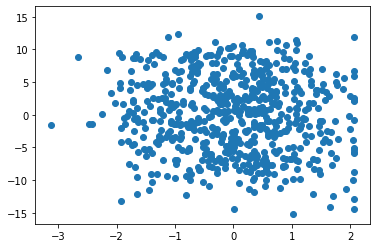

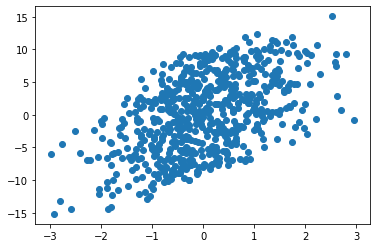

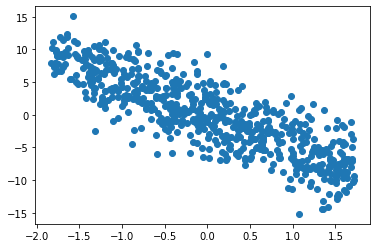

In [12]:
for i in [0,1,2]:
    plt.figure(i)
    plt.scatter(df.iloc[:, i], df['y1'])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

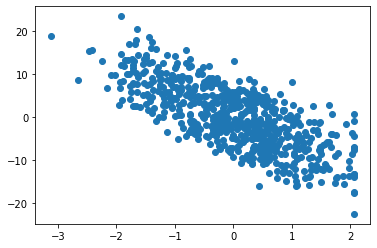

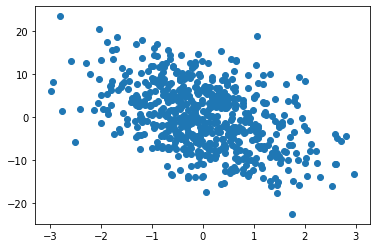

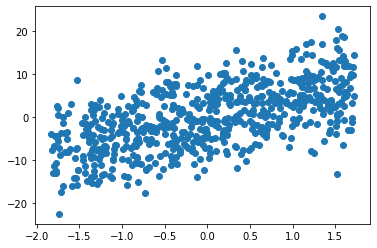

In [13]:
for i in [0,1,2]:
    plt.figure(i)
    plt.scatter(df.iloc[:, i], df['y2'])

In [14]:
df.to_csv('sample.csv', index=False)

with open('coeff.txt', 'w') as f:
    f.write(str(coeff))

24